# 학생 성적 데이터 분석 (Student Performance Analysis)

이 노트북은 `Student_Performance_Dataset.csv` 파일을 분석하여 학생들의 성적에 영향을 미치는 요인을 파악하고 주요 인사이트를 시각화합니다.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 윈도우 환경에서 한글 폰트 설정 (맑은 고딕)
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

## 1. 데이터 불러오기

In [13]:
df = pd.read_csv('Student_Performance_Dataset.csv')
df.head()

,Student_ID,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Parental_Education,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage,Performance_Level,Pass_Fail
0,S0001,15,Male,12,1.0,65,Postgraduate,No,No,40,39,72,81,50.33,Average,Pass
1,S0002,19,Female,9,1.6,58,Graduate,No,Yes,80,44,35,47,53.00,Average,Pass
2,S0003,14,Female,12,3.6,64,High School,Yes,Yes,83,73,59,58,71.67,Good,Pass
3,S0004,18,Female,9,5.5,68,Postgraduate,Yes,No,68,48,77,54,64.33,Average,Pass
4,S0005,14,Male,10,5.0,80,High School,Yes,No,41,46,36,68,41.00,Poor,Fail


## 2. 데이터 개요 확인

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Gender                      5000 non-null   object 
 3   Class                       5000 non-null   int64  
 4   Study_Hours_Per_Day         5000 non-null   float64
 5   Attendance_Percentage       5000 non-null   int64  
 6   Parental_Education          5000 non-null   object 
 7   Internet_Access             5000 non-null   object 
 8   Extracurricular_Activities  5000 non-null   object 
 9   Math_Score                  5000 non-null   int64  
 10  Science_Score               5000 non-null   int64  
 11  English_Score               5000 non-null   int64  
 12  Previous_Year_Score         5000 non-null   int64  
 13  Final_Percentage            5000 

In [15]:
df.describe()

,Age,Class,Study_Hours_Per_Day,Attendance_Percentage,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,16.508800,10.496400,3.287260,74.919800,67.754800,66.895400,67.782800,67.282200,67.477656
std,1.718637,1.106812,1.587979,14.673842,18.724487,19.141195,19.248473,16.157511,10.964081
min,14.000000,9.000000,0.500000,50.000000,35.000000,35.000000,35.000000,40.000000,36.330000
25%,15.000000,10.000000,1.900000,62.000000,52.000000,50.000000,51.000000,53.000000,59.670000
50%,17.000000,10.000000,3.300000,75.000000,68.000000,67.000000,68.000000,67.000000,67.330000
75%,18.000000,11.000000,4.700000,88.000000,84.000000,83.000000,85.000000,81.000000,75.330000
max,19.000000,12.000000,6.000000,100.000000,100.000000,100.000000,100.000000,95.000000,98.330000


## 3. 탐색적 데이터 분석 (EDA)

### 3.1 최종 점수(Final Percentage) 분포

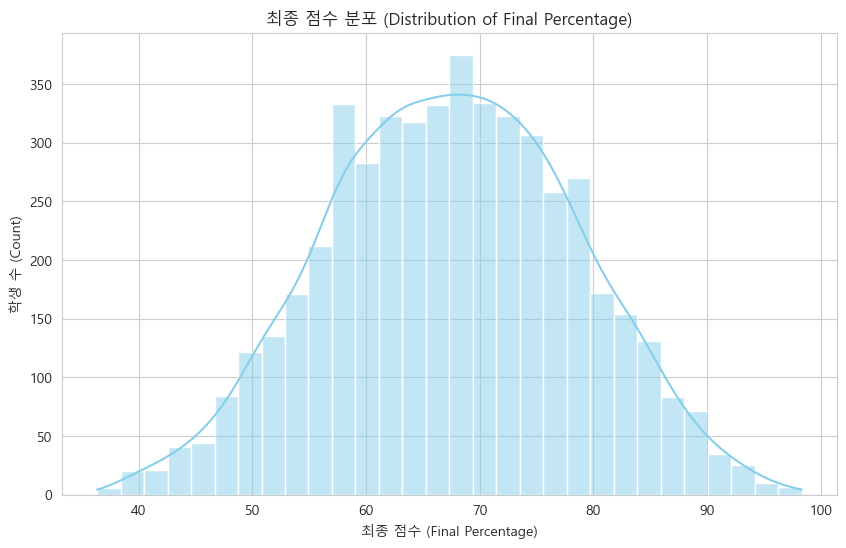

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Final_Percentage'], bins=30, kde=True, color='skyblue')
plt.title('최종 점수 분포 (Distribution of Final Percentage)')
plt.xlabel('최종 점수 (Final Percentage)')
plt.ylabel('학생 수 (Count)')
plt.show()

### 3.2 상관관계 분석
수치형 변수들 간의 상관관계를 확인합니다.

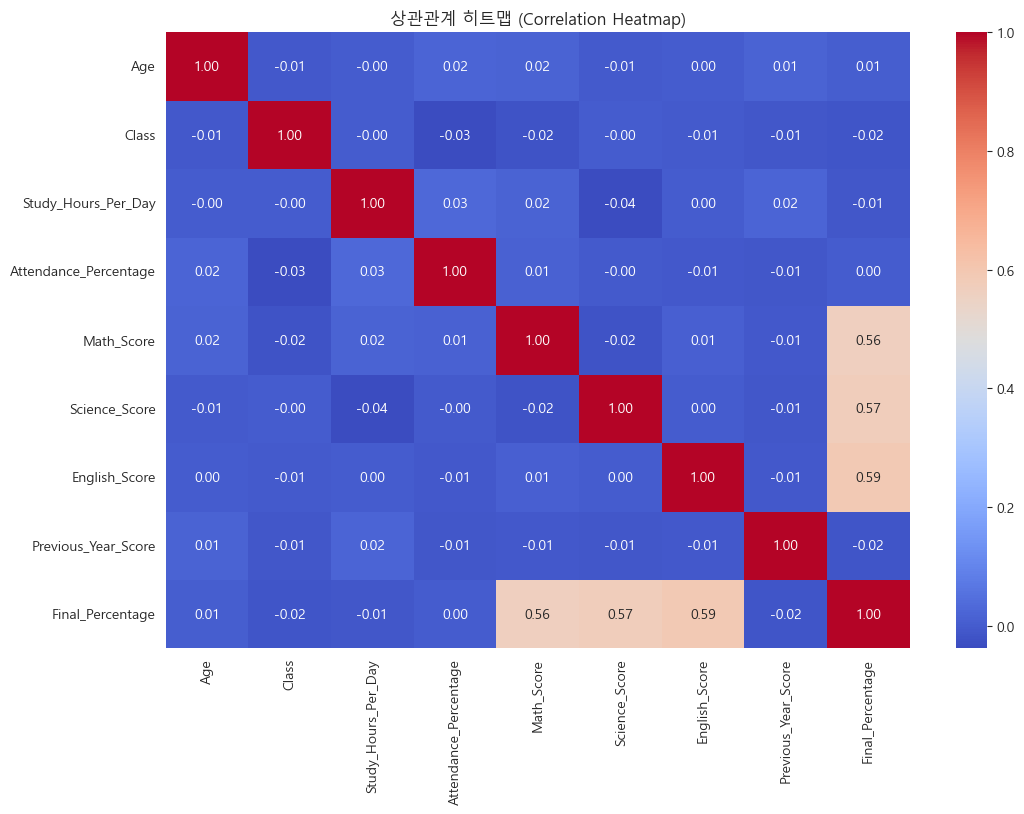

In [17]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('상관관계 히트맵 (Correlation Heatmap)')
plt.show()

### 3.3 공부 시간과 최종 점수의 관계

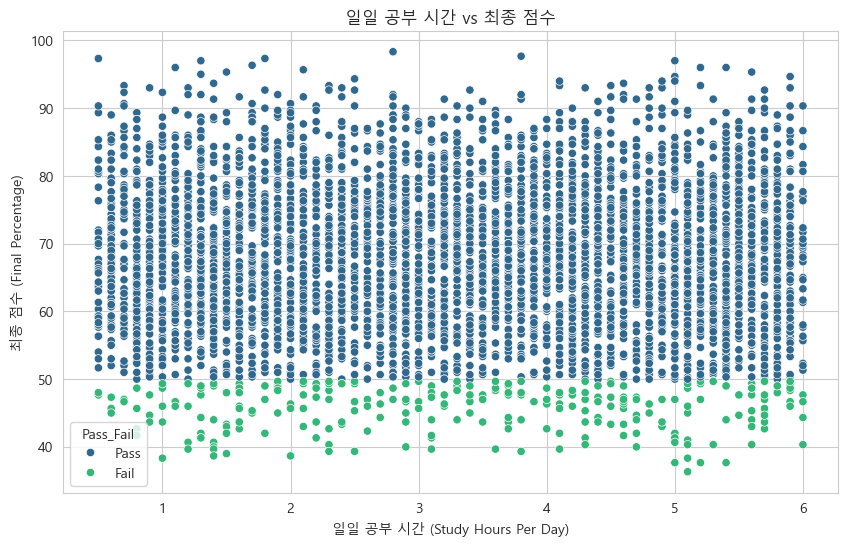

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study_Hours_Per_Day', y='Final_Percentage', data=df, hue='Pass_Fail', palette='viridis')
plt.title('일일 공부 시간 vs 최종 점수')
plt.xlabel('일일 공부 시간 (Study Hours Per Day)')
plt.ylabel('최종 점수 (Final Percentage)')
plt.show()

### 3.4 출석률과 최종 점수의 관계

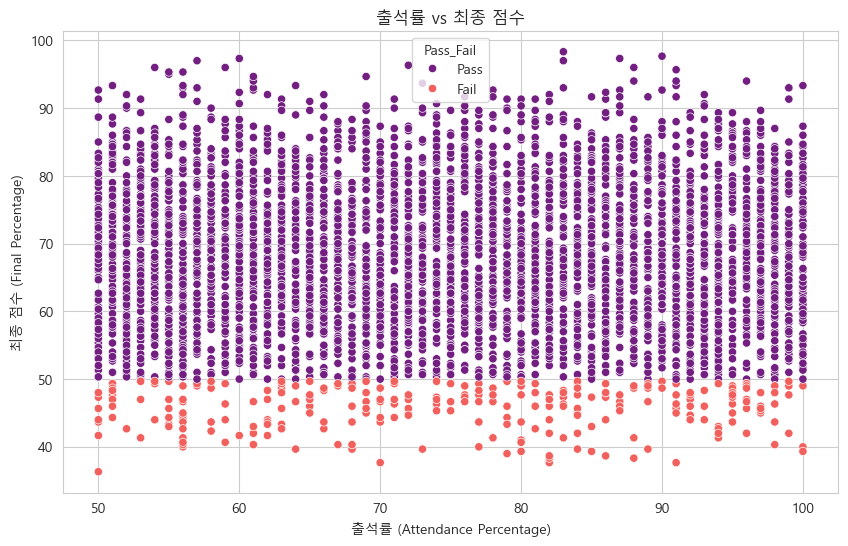

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attendance_Percentage', y='Final_Percentage', data=df, hue='Pass_Fail', palette='magma')
plt.title('출석률 vs 최종 점수')
plt.xlabel('출석률 (Attendance Percentage)')
plt.ylabel('최종 점수 (Final Percentage)')
plt.show()

### 3.5 부모님 교육 수준에 따른 성적 차이

C:\Users\UserK\AppData\Local\Temp\ipykernel_20868\1968990582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Parental_Education', y='Final_Percentage', data=df, palette='Set2')


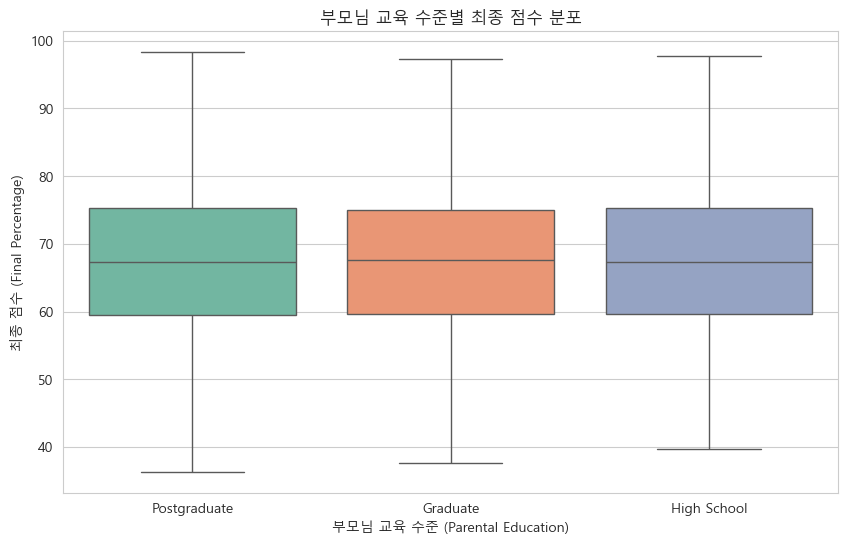

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Parental_Education', y='Final_Percentage', data=df, palette='Set2')
plt.title('부모님 교육 수준별 최종 점수 분포')
plt.xlabel('부모님 교육 수준 (Parental Education)')
plt.ylabel('최종 점수 (Final Percentage)')
plt.show()

### 3.6 성과 수준(Performance Level) 빈도

C:\Users\UserK\AppData\Local\Temp\ipykernel_20868\1611640359.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Performance_Level', data=df, palette='pastel', order=['Poor', 'Average', 'Good', 'Excellent'])


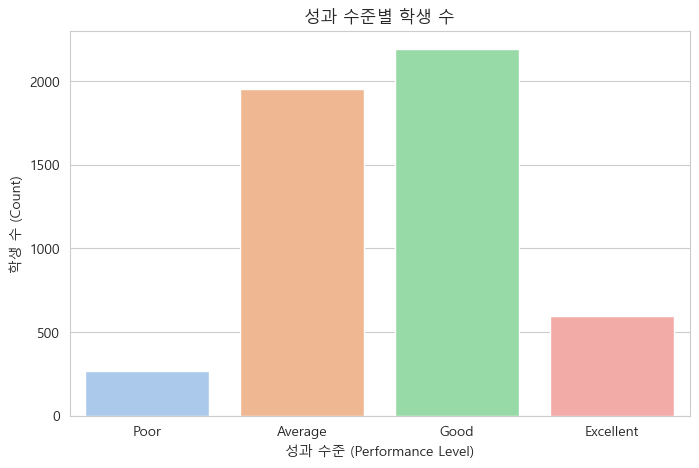

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Performance_Level', data=df, palette='pastel', order=['Poor', 'Average', 'Good', 'Excellent'])
plt.title('성과 수준별 학생 수')
plt.xlabel('성과 수준 (Performance Level)')
plt.ylabel('학생 수 (Count)')
plt.show()

## 4. 주요 인사이트 도출 (Key Insights)

데이터 분석을 통해 얻을 수 있는 주요 인사이트는 다음과 같습니다:

1. **상관관계 확인**: `상관관계 히트맵`을 통해 어떤 변수가 최종 점수(`Final_Percentage`)와 가장 강한 양의 상관관계를 가지는지 확인할 수 있습니다. 일반적으로 **이전 연도 점수(Previous_Year_Score)**나 **공부 시간**, **출석률**이 높은 상관관계를 보입니다.
2. **공부 시간의 영향**: 산점도를 통해 공부 시간이 늘어날수록 성적이 향상되는 경향이 있는지 직관적으로 파악할 수 있습니다.
3. **출석률의 중요성**: 출석률이 높은 학생들이 높은 성적을 유지하는지, 그리고 낙제(Fail)한 학생들의 출석률 패턴은 어떤지 확인할 수 있습니다.
4. **부모님 교육 수준**: 부모님의 교육 수준(고졸, 대졸, 대학원졸 등)에 따라 학생들의 성적 분포 중앙값이 어떻게 달라지는지 박스 플롯으로 비교 가능합니다.
5. **성적 분포**: 전체적으로 학생들의 성적이 정규분포를 따르는지, 아니면 특정 점수대에 몰려있는지 파악할 수 있습니다.

In [22]:
# 코드로 상관관계가 높은 변수 상위 5개 출력해보기
numeric_df = df.select_dtypes(include=[np.number])
correlations = numeric_df.corr()['Final_Percentage'].sort_values(ascending=False)
print("=== 최종 점수와 상관관계가 높은 변수 Top 5 ===")
print(correlations.head(6))  # 자기 자신 포함이므로 6개

=== 최종 점수와 상관관계가 높은 변수 Top 5 ===
Final_Percentage         1.000000
English_Score            0.591922
Science_Score            0.571914
Math_Score               0.563523
Age                      0.005963
Attendance_Percentage    0.000796
Name: Final_Percentage, dtype: float64


C:\Users\UserK\AppData\Local\Temp\ipykernel_20868\2275030760.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.head(10).index, y=correlations.head(10).values, palette='viridis')


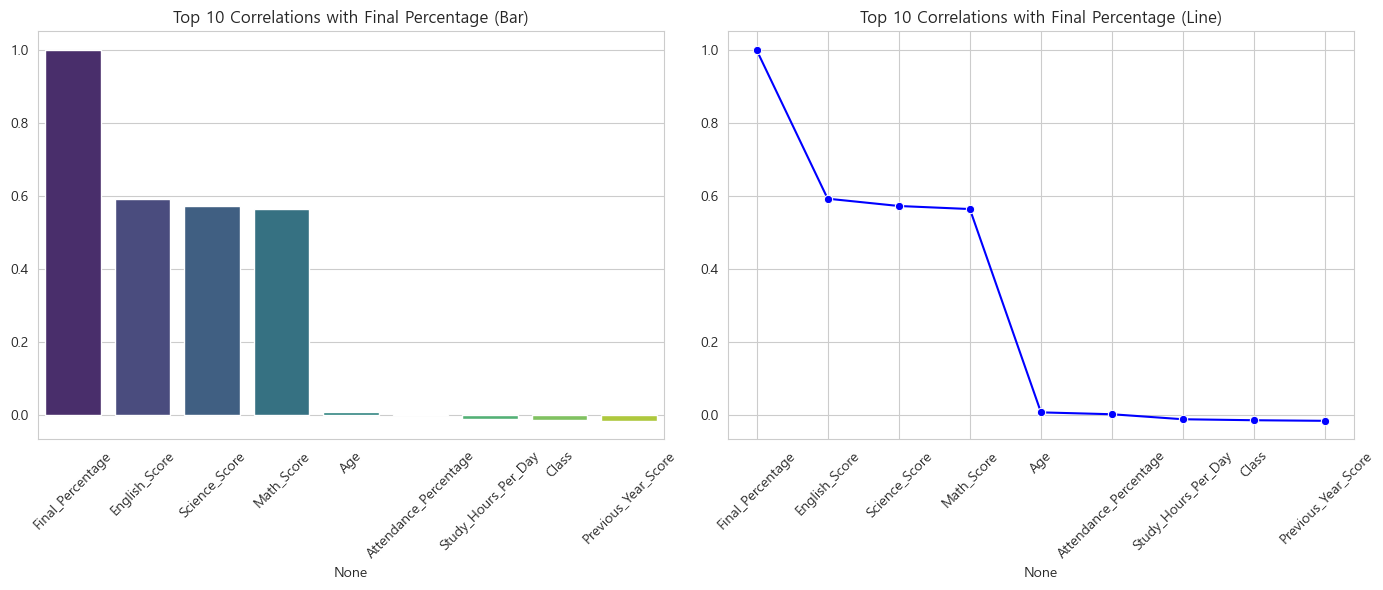

In [23]:
# 상관관계 시각화 (막대 그래프 및 선 그래프)
plt.figure(figsize=(14, 6))

# 막대 그래프
plt.subplot(1, 2, 1)
sns.barplot(x=correlations.head(10).index, y=correlations.head(10).values, palette='viridis')
plt.title('Top 10 Correlations with Final Percentage (Bar)')
plt.xticks(rotation=45)

# 선 그래프
plt.subplot(1, 2, 2)
sns.lineplot(x=correlations.head(10).index, y=correlations.head(10).values, marker='o', color='b')
plt.title('Top 10 Correlations with Final Percentage (Line)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

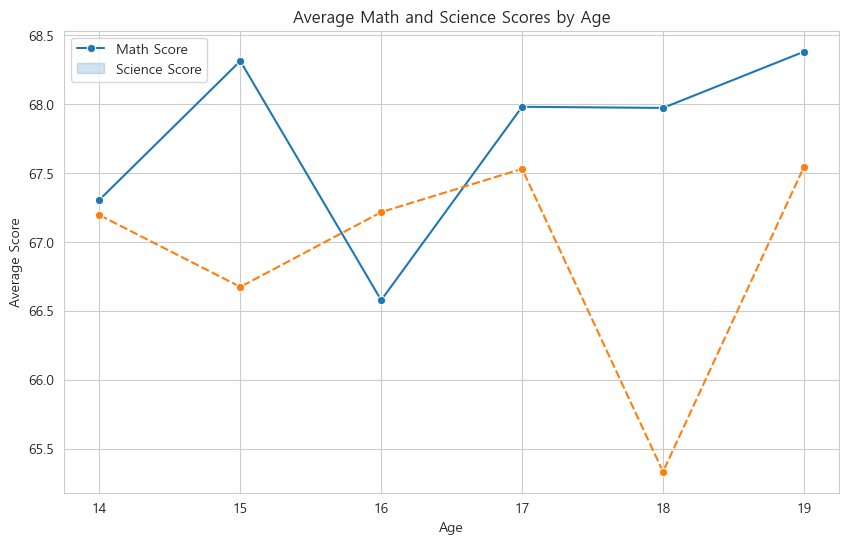

수학/과학 점수 격차가 가장 작은 나이 (중간점):
     Math_Score  Science_Score       Gap
Age                                     
14    67.305065      67.194346  0.110718


In [24]:
# 나이별 수학 및 과학 점수 분석
age_performance = df.groupby('Age')[['Math_Score', 'Science_Score']].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(data=age_performance, marker='o')
plt.title('Average Math and Science Scores by Age')
plt.ylabel('Average Score')
plt.xlabel('Age')
plt.grid(True)
plt.legend(['Math Score', 'Science Score'])
plt.xticks(age_performance.index)
plt.show()

# 점수가 만나는 지점 또는 격차가 가장 작은 지점 확인
age_performance['Gap'] = abs(age_performance['Math_Score'] - age_performance['Science_Score'])
min_top = age_performance.sort_values('Gap').head(1)
print("수학/과학 점수 격차가 가장 작은 나이 (중간점):")
print(min_top[['Math_Score', 'Science_Score', 'Gap']])

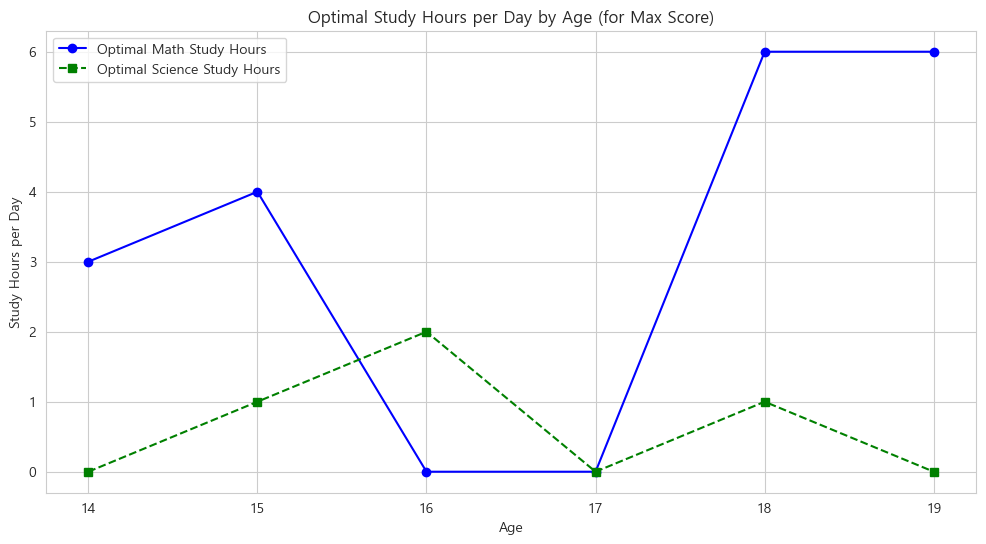

--- 나이별 최적 학습 시간 (수학) ---
 Age  Study_Hours_Rounded  Math_Score
  14                  3.0   69.709924
  15                  4.0   69.514793
  16                  0.0   74.571429
  17                  0.0   70.416667
  18                  6.0   69.590000
  19                  6.0   70.804124

--- 나이별 최적 학습 시간 (과학) ---
 Age  Study_Hours_Rounded  Science_Score
  14                  0.0      72.900000
  15                  1.0      69.830769
  16                  2.0      68.085714
  17                  0.0      81.916667
  18                  1.0      69.104895
  19                  0.0      71.500000


In [25]:
# 나이별 수학 및 과학 최적 학습 시간 분석

# 학습 시간을 반올림하여 그룹화 (공부 시간 구간 생성)
df['Study_Hours_Rounded'] = df['Study_Hours_Per_Day'].round(0)

# 나이와 학습 시간 구간별 평균 점수 계산
age_study_perf = df.groupby(['Age', 'Study_Hours_Rounded'])[['Math_Score', 'Science_Score']].mean().reset_index()

# 각 나이별로 가장 높은 점수를 낸 학습 시간 찾기
optimal_math = age_study_perf.loc[age_study_perf.groupby('Age')['Math_Score'].idxmax()]
optimal_science = age_study_perf.loc[age_study_perf.groupby('Age')['Science_Score'].idxmax()]

# 시각화
plt.figure(figsize=(12, 6))

plt.plot(optimal_math['Age'], optimal_math['Study_Hours_Rounded'], marker='o', label='Optimal Math Study Hours', linestyle='-', color='blue')
plt.plot(optimal_science['Age'], optimal_science['Study_Hours_Rounded'], marker='s', label='Optimal Science Study Hours', linestyle='--', color='green')

plt.title('Optimal Study Hours per Day by Age (for Max Score)')
plt.xlabel('Age')
plt.ylabel('Study Hours per Day')
plt.legend()
plt.grid(True)
plt.xticks(optimal_math['Age'].unique())
plt.yticks(sorted(df['Study_Hours_Rounded'].unique()))
plt.show()

print("--- 나이별 최적 학습 시간 (수학) ---")
print(optimal_math[['Age', 'Study_Hours_Rounded', 'Math_Score']].to_string(index=False))
print("\n--- 나이별 최적 학습 시간 (과학) ---")
print(optimal_science[['Age', 'Study_Hours_Rounded', 'Science_Score']].to_string(index=False))